In [1]:
import pandas as pd

df = pd.read_csv('Complexes.csv')

In [2]:
# 将字符串'{'A/A': 'GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC'}'转换为字典{'A/A': 'GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC'}

df['rna_chain_sequences'].apply(lambda x: eval(x))

0              {'A/A': 'GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC'}
1              {'A/A': 'GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC'}
2                            {'A/A': 'GGGAAGAAACUGUAGC'}
3               {'A/N': 'GGCAGAUCUGAGCCUGGGAGCUCUCUGCC'}
4           {'A/A': 'GGCGAUACCAGCCGAAAGGCCCUUGGCAGCGUC'}
                             ...                        
857    {'A/A': 'GCGUACGAAGGAGAGGAGAGGAUGAGGAGAGUACGC'...
858    {'A/N': 'GACAAAGAUAAAAACACAACGUAUGGCGAAACACGUC...
859    {'A/N': 'GGACAAAGAUAAAAACACAACGUAUGGCGAAACACGU...
860           {'A/A': 'ACUUAAGUCG', 'B/B': 'ACUUAAGUCG'}
861       {'A/AAA': 'ACUUAAGUCG', 'B/BBB': 'ACUUAAGUCG'}
Name: rna_chain_sequences, Length: 862, dtype: object

In [3]:
# 取出字典中所有的值，转换为列表

df['rna_chain_sequences'].apply(lambda x: list(eval(x).values()))

0                       [GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC]
1                       [GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC]
2                                     [GGGAAGAAACUGUAGC]
3                        [GGCAGAUCUGAGCCUGGGAGCUCUCUGCC]
4                    [GGCGAUACCAGCCGAAAGGCCCUUGGCAGCGUC]
                             ...                        
857    [GCGUACGAAGGAGAGGAGAGGAUGAGGAGAGUACGC, GCGUACG...
858    [GACAAAGAUAAAAACACAACGUAUGGCGAAACACGUCAUACAGAU...
859    [GGACAAAGAUAAAAACACAACGUAUGGCGAAACACGUCAUACAGA...
860                             [ACUUAAGUCG, ACUUAAGUCG]
861                             [ACUUAAGUCG, ACUUAAGUCG]
Name: rna_chain_sequences, Length: 862, dtype: object

In [4]:
# 将列表中的所有字符串拼接起来

df['rna_sequences_concat'] = df['rna_chain_sequences'].apply(lambda x: ''.join(list(eval(x).values())))

In [5]:
df['rna_sequences_length'] = df['rna_sequences_concat'].apply(lambda x: len(x))
df['rna_sequences_length']

0       30
1       30
2       16
3       29
4       33
      ... 
857    108
858    248
859    251
860     20
861     20
Name: rna_sequences_length, Length: 862, dtype: int64

In [6]:
# 查看长度小于等于500的rna_sequences_length的个数

df[(df['rna_sequences_length'] >= 20) & (df['rna_sequences_length'] <= 500)][['id', 'rna_sequences_length']]

,id,rna_sequences_length
0,1aju,30
1,1akx,30
3,1arj,29
4,1eht,33
5,1ei2,25
...,...,...
857,8u60,108
858,8uiw,248
859,8uta,251
860,8vaw,20


<Axes: ylabel='Frequency'>

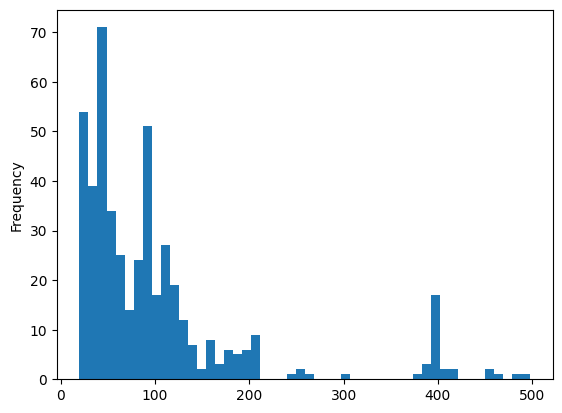

In [7]:
# 画出rna_sequences_length的直方图

df[(df['rna_sequences_length'] >= 20) & (df['rna_sequences_length'] <= 500)]['rna_sequences_length'].plot(kind='hist', bins=50)

In [8]:
df = df[(df['rna_sequences_length'] >= 20) & (df['rna_sequences_length'] <= 500)]

In [9]:
df['ligand_list'] = df['sm_ligand_ids'].apply(eval)

In [10]:
df

,id,title,deposition_date,molecule_type,molecular_weight,experimental_method,experimental_resolution,reference_publication,rna_entities,rna_chain_sequences,rna_genus,sm_ligand_ids,sm_ligand_weight,sm_ligand_pocket_size,sm_ligand_rna_chains,sm_ligand_ions,rna_sequences_concat,rna_sequences_length,ligand_list
0,1aju,"HIV-2 TAR-ARGININAMIDE COMPLEX, NMR, 20 STRUCT...",1997-05-10,R,9.83,NMR,NaN,"{'DOI': '10.1006/jmbi.1996.0879', 'article_yea...",{'T': None},{'A/A': 'GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC'},NaN,['ARG_.:B/47:A'],{'ARG_.:B/47:A': 175.12},{'ARG_.:B/47:A': 140},{'ARG_.:B/47:A': ['A/A']},{'ARG_.:B/47:A': {}},GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC,30,[ARG_.:B/47:A]
1,1akx,HIV-2 TRANS ACTIVATING REGION RNA COMPLEX WITH...,1997-05-27,R,9.83,NMR,NaN,"{'DOI': '10.1006/jmbi.1996.0879', 'article_yea...",{'T': None},{'A/A': 'GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC'},NaN,['ARG_.:B/47:A'],{'ARG_.:B/47:A': 175.12},{'ARG_.:B/47:A': 140},{'ARG_.:B/47:A': ['A/A']},{'ARG_.:B/47:A': {}},GGCCAGAUUGAGCCUGGGAGCUCUCUGGCC,30,[ARG_.:B/47:A]
3,1arj,"ARG-BOUND TAR RNA, NMR",1995-08-30,R,9.48,NMR,NaN,"{'DOI': '10.1006/jmbi.1995.0555', 'article_yea...",{'T': None},{'A/N': 'GGCAGAUCUGAGCCUGGGAGCUCUCUGCC'},NaN,['ARG_.:B/1:N'],{'ARG_.:B/1:N': 175.12},{'ARG_.:B/1:N': 167},{'ARG_.:B/1:N': ['A/N']},{'ARG_.:B/1:N': {}},GGCAGAUCUGAGCCUGGGAGCUCUCUGCC,29,[ARG_.:B/1:N]
4,1eht,THEOPHYLLINE-BINDING RNA IN COMPLEX WITH THEOP...,1997-03-20,R,10.82,NMR,NaN,"{'DOI': '10.1038/nsb0897-644', 'article_year':...",{'T': None},{'A/A': 'GGCGAUACCAGCCGAAAGGCCCUUGGCAGCGUC'},NaN,['TEP_.:B/34:A'],{'TEP_.:B/34:A': 180.07},{'TEP_.:B/34:A': 174},{'TEP_.:B/34:A': ['A/A']},{'TEP_.:B/34:A': {}},GGCGAUACCAGCCGAAAGGCCCUUGGCAGCGUC,33,[TEP_.:B/34:A]
5,1ei2,STRUCTURAL BASIS FOR RECOGNITION OF THE RNA MA...,2000-02-23,R,8.61,NMR,NaN,"{'DOI': '10.1093/nar/28.3.710', 'article_year'...",{'T': None},{'A/A': 'GGCAGUGUGAGUACCUUCACACGUC'},Homo,['NMY_.:B/26:A'],{'NMY_.:B/26:A': 614.31},{'NMY_.:B/26:A': 245},{'NMY_.:B/26:A': ['A/A']},{'NMY_.:B/26:A': {}},GGCAGUGUGAGUACCUUCACACGUC,25,[NMY_.:B/26:A]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,8u60,Structure of Mango II variant2 aptamer bound t...,2023-09-13,R,37.44,XR,3.30,NaN,{'R': None},{'A/A': 'GCGUACGAAGGAGAGGAGAGGAUGAGGAGAGUACGC'...,NaN,"['VK0_.:H/105:A', 'VK0_.:M/105:B', 'VK0_.:R/10...","{'VK0_.:H/105:A': 411.15, 'VK0_.:M/105:B': 411...","{'VK0_.:H/105:A': 138, 'VK0_.:M/105:B': 136, '...","{'VK0_.:H/105:A': ['A/A'], 'VK0_.:M/105:B': ['...","{'VK0_.:H/105:A': {'K': 1}, 'VK0_.:M/105:B': {...",GCGUACGAAGGAGAGGAGAGGAUGAGGAGAGUACGCGCGUACGAAG...,108,"[VK0_.:H/105:A, VK0_.:M/105:B, VK0_.:R/105:C]"
858,8uiw,yjdF riboswitch from R. gauvreauii in complex ...,2023-10-10,RP,180.54,XR,2.77,"{'DOI': '10.1038/s41421-024-00663-2', 'article...",{'y': None},{'A/N': 'GACAAAGAUAAAAACACAACGUAUGGCGAAACACGUC...,Ruminococcus,"['CTI_.:H/202:N', 'CTI_.:M/205:R']","{'CTI_.:H/202:N': 348.12, 'CTI_.:M/205:R': 348...","{'CTI_.:H/202:N': 120, 'CTI_.:M/205:R': 113}","{'CTI_.:H/202:N': ['A/N'], 'CTI_.:M/205:R': ['...","{'CTI_.:H/202:N': {}, 'CTI_.:M/205:R': {}}",GACAAAGAUAAAAACACAACGUAUGGCGAAACACGUCAUACAGAUC...,248,"[CTI_.:H/202:N, CTI_.:M/205:R]"
859,8uta,yjdF riboswitch from R. gauvreauii in complex ...,2023-10-30,RP,179.17,XR,3.05,"{'DOI': '10.1038/s41421-024-00663-2', 'article...",{'y': None},{'A/N': 'GGACAAAGAUAAAAACACAACGUAUGGCGAAACACGU...,Ruminococcus,"['PRL_.:J/204:N', 'PRL_.:N/204:R']","{'PRL_.:J/204:N': 209.1, 'PRL_.:N/204:R': 209.1}","{'PRL_.:J/204:N': 86, 'PRL_.:N/204:R': 81}","{'PRL_.:J/204:N': ['A/N'], 'PRL_.:N/204:R': ['...","{'PRL_.:J/204:N': {}, 'PRL_.:N/204:R': {}}",GGACAAAGAUAAAAACACAACGUAUGGCGAAACACGUCAUACAGAU...,251,"[PRL_.:J/204:N, PRL_.:N/204:R]"
860,8vaw,Magnesium catalyzed primer extension product w...,2023-12-11,R,10.54,XR,1.25,"{'DOI': '10.1021/jacs.4c00323', 'article_year'...",{'M': None},"{'A/A': 'ACUUAAGUCG', 'B/B': 'ACUUAAGUCG'}",NaN,"['DGP_.:E/203:A', 'DGP_.:H/203:B']","{'DGP_.:E/203:A': 347.06, 'DGP_.:H/203:B': 347...","{'DGP

In [11]:
df = df[['id', 'ligand_list']]

In [12]:
df = df.explode('ligand_list')

In [13]:
df

,id,ligand_list
0,1aju,ARG_.:B/47:A
1,1akx,ARG_.:B/47:A
3,1arj,ARG_.:B/1:N
4,1eht,TEP_.:B/34:A
5,1ei2,NMY_.:B/26:A
...,...,...
859,8uta,PRL_.:N/204:R
860,8vaw,DGP_.:E/203:A
860,8vaw,DGP_.:H/203:B
861,8vax,DGP_.:E/101:BBB


In [14]:
ligand = df['ligand_list'][0].split(':')
ligand

['ARG_.', 'B/47', 'A']

In [15]:
residue_name = ligand[0].split('_')[0]
residue_number = ligand[1].split('/')[1]
chain_id = ligand[2]

print(residue_name, residue_number, chain_id)

ARG 47 A


In [16]:
df['residue_name'] = df['ligand_list'].apply(lambda x: x.split(':')[0].split('_')[0])

In [17]:
df

,id,ligand_list,residue_name
0,1aju,ARG_.:B/47:A,ARG
1,1akx,ARG_.:B/47:A,ARG
3,1arj,ARG_.:B/1:N,ARG
4,1eht,TEP_.:B/34:A,TEP
5,1ei2,NMY_.:B/26:A,NMY
...,...,...,...
859,8uta,PRL_.:N/204:R,PRL
860,8vaw,DGP_.:E/203:A,DGP
860,8vaw,DGP_.:H/203:B,DGP
861,8vax,DGP_.:E/101:BBB,DGP


In [18]:
CCD = df['residue_name'].unique()

In [19]:
pdb_ids = df['id'].unique()

In [20]:
def fetch_pdb(pdir, pdb_id):
    import os
    os.system('wget https://files.rcsb.org/download/{}.pdb -O {}/{}.pdb'.format(pdb_id, pdir, pdb_id))

In [21]:
from tqdm import tqdm

for pdb_id in tqdm(pdb_ids):
    fetch_pdb('/amax/wmzhu/RNABind/bs_data/pdb', pdb_id)

  0%|          | 0/468 [00:00<?, ?it/s]/amax/wmzhu/RNABind/bs_data/pdb/1aju.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1akx.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1arj.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1eht.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1ei2.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1evv.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1f1t.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1f27.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1fmn.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1fuf.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1fyp.pdb: No such file or directory
  2%|▏         | 11/468 [00:00<00:04, 105.89it/s]/amax/wmzhu/RNABind/bs_data/pdb/1i2y.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/pdb/1i9v.pdb: No such file or directory
/amax/wmzhu/RNABind/bs_data/

In [ ]:
# 将pdb文件中的修饰残基转换为标准残基
import json 
import os

json_file = '/amax/wmzhu/RNABind/bs_data/modifications_cache.json'
with open(json_file, 'r') as f:
    data = json.load(f)

residue_dict = data['rna']

In [ ]:
residue_dict

{'00A': 'A',
 '05A': 'T',
 '05H': 'T',
 '05K': 'T',
 '0AD': 'G',
 '0AM': 'A',
 '0AP': 'C',
 '0AU': 'U',
 '0AV': 'A',
 '0C': 'C',
 '0DA': 'A',
 '0DC': 'C',
 '0DG': 'G',
 '0DT': 'T',
 '0G': 'G',
 '0R8': 'C',
 '0SP': 'A',
 '0U': 'U',
 '0UH': 'G',
 '102': 'G',
 '10C': 'C',
 '125': 'U',
 '126': 'U',
 '127': 'U',
 '12A': 'A',
 '16B': 'C',
 '18M': 'G',
 '18Q': 'U',
 '1AP': 'A',
 '1CC': 'C',
 '1FC': 'C',
 '1MA': 'A',
 '1MG': 'G',
 '1RN': 'U',
 '1SC': 'C',
 '23G': 'G',
 '26A': 'A',
 '2AR': 'A',
 '2AT': 'T',
 '2AU': 'U',
 '2BD': 'I',
 '2BT': 'T',
 '2BU': 'A',
 '2DA': 'A',
 '2DT': 'T',
 '2EG': 'G',
 '2GT': 'T',
 '2JV': 'G',
 '2MA': 'A',
 '2MG': 'G',
 '2MU': 'U',
 '2NT': 'T',
 '2OM': 'U',
 '2OT': 'T',
 '2PR': 'G',
 '2SG': 'G',
 '2ST': 'T',
 '31H': 'A',
 '31M': 'A',
 '3AU': 'U',
 '3DA': 'A',
 '3ME': 'U',
 '3MU': 'U',
 '3TD': 'U',
 '45A': 'A',
 '47C': 'C',
 '4OC': 'C',
 '4PC': 'C',
 '4PD': 'C',
 '4PE': 'C',
 '4SC': 'C',
 '4SU': 'U',
 '4U3': 'C',
 '5AA': 'A',
 '5AT': 'T',
 '5BU': 'U',
 '5CG': 'G',
 '

In [ ]:
# 如果修饰残基对应的是T, 则将其转换为U

for key in residue_dict:
    if residue_dict[key] == 'T':
        residue_dict[key] = 'U'

In [ ]:
residue_dict

{'00A': 'A',
 '05A': 'U',
 '05H': 'U',
 '05K': 'U',
 '0AD': 'G',
 '0AM': 'A',
 '0AP': 'C',
 '0AU': 'U',
 '0AV': 'A',
 '0C': 'C',
 '0DA': 'A',
 '0DC': 'C',
 '0DG': 'G',
 '0DT': 'U',
 '0G': 'G',
 '0R8': 'C',
 '0SP': 'A',
 '0U': 'U',
 '0UH': 'G',
 '102': 'G',
 '10C': 'C',
 '125': 'U',
 '126': 'U',
 '127': 'U',
 '12A': 'A',
 '16B': 'C',
 '18M': 'G',
 '18Q': 'U',
 '1AP': 'A',
 '1CC': 'C',
 '1FC': 'C',
 '1MA': 'A',
 '1MG': 'G',
 '1RN': 'U',
 '1SC': 'C',
 '23G': 'G',
 '26A': 'A',
 '2AR': 'A',
 '2AT': 'U',
 '2AU': 'U',
 '2BD': 'I',
 '2BT': 'U',
 '2BU': 'A',
 '2DA': 'A',
 '2DT': 'U',
 '2EG': 'G',
 '2GT': 'U',
 '2JV': 'G',
 '2MA': 'A',
 '2MG': 'G',
 '2MU': 'U',
 '2NT': 'U',
 '2OM': 'U',
 '2OT': 'U',
 '2PR': 'G',
 '2SG': 'G',
 '2ST': 'U',
 '31H': 'A',
 '31M': 'A',
 '3AU': 'U',
 '3DA': 'A',
 '3ME': 'U',
 '3MU': 'U',
 '3TD': 'U',
 '45A': 'A',
 '47C': 'C',
 '4OC': 'C',
 '4PC': 'C',
 '4PD': 'C',
 '4PE': 'C',
 '4SC': 'C',
 '4SU': 'U',
 '4U3': 'C',
 '5AA': 'A',
 '5AT': 'U',
 '5BU': 'U',
 '5CG': 'G',
 '

In [ ]:
# GTP G
# GNG G
# DGP G
# PZG G
# 8OS G
# EQ4 G
# ADP A
# TG G
for i in CCD:
    if i in residue_dict.keys():
        print(i, residue_dict[i])

In [ ]:
# 将pdb文件中的修饰残基转换为标准残基
from Bio.PDB import PDBParser, PDBIO, Structure, Model, Chain
def convert_modification(pdb_dir, pdb_file, output_dir, output_file):
    parser = PDBParser()
    structure = parser.get_structure('X', pdb_dir + '/' + pdb_file)
    model = structure.get_models() 
    models = list(model) 
    chain_lst = list(models[0].get_chains())
    for chain in chain_lst:
        residue_lst = list(chain.get_residues())
        for residue in residue_lst:
            residue_id = residue.get_id()
            residue_name = residue.get_resname()
            if residue_name in residue_dict:
                residue.resname = residue_dict[residue_name]
    io = PDBIO()
    io.set_structure(structure)
    io.save(output_dir + '/' + output_file)

In [ ]:
from tqdm import tqdm

pdb_dir = '/amax/wmzhu/RNABind/bs_data/pdb'
mdf_output_dir = '/amax/wmzhu/RNABind/bs_data/mdf_pdb'
os.makedirs(mdf_output_dir, exist_ok=True)
for pdb_id in tqdm(pdb_ids):
    convert_modification(pdb_dir, pdb_file=pdb_id + '.pdb', output_dir=mdf_output_dir, output_file=pdb_id + '_mdf.pdb')

  1%|          | 5/485 [00:01<02:24,  3.31it/s]/amax/yxwang/anaconda3/envs/RNABind/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1088.
  warnings.warn(
/amax/yxwang/anaconda3/envs/RNABind/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1109.
  warnings.warn(
/amax/yxwang/anaconda3/envs/RNABind/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1110.
  warnings.warn(
/amax/yxwang/anaconda3/envs/RNABind/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1227.
  warnings.warn(
  2%|▏         | 9/485 [00:01<01:05,  7.28it/s]/amax/yxwang/anaconda3/envs/RNABind/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 928.

In [ ]:
def save_ligand(pdb_dir, pdb_file, output_dir, output_file):
    parser = PDBParser()
    structure = parser.get_structure('X', pdb_dir + '/' + pdb_file)
    ligand_lst = []
    model = structure.get_models() 
    models = list(model) 
    chain_lst = list(models[0].get_chains())
    for chain in chain_lst:
        residue_lst = list(chain.get_residues())
        for residue in residue_lst:
            residue_id = residue.get_id()
            residue_name = residue.get_resname()
            if (residue_id[0] != ' ') and (residue_id[0] != 'W') and (residue_name in CCD):
                ligand_lst.append(residue)

    # 创建一个新的Structure对象
    ligand_structure = Structure.Structure('Ligand')
    ligand_model = Model.Model(0)
    ligand_structure.add(ligand_model)
    for i, ligand in enumerate(ligand_lst):
        ligand_chain = Chain.Chain(chr(i + 65))  # 使用ASCII字符作为链的ID
        ligand_chain.add(ligand)
        ligand_model.add(ligand_chain)

    # 保存为pdb文件
    io = PDBIO()
    io.set_structure(ligand_structure)
    io.save(output_dir + '/' + output_file)

In [ ]:
mdf_pdb_dir = '/amax/wmzhu/RNABind/bs_data/mdf_pdb' 
ligand_output_dir = '/amax/wmzhu/RNABind/bs_data/ligand_pdb'
os.makedirs(ligand_output_dir, exist_ok=True)
for pdb_id in tqdm(pdb_ids):
    save_ligand(mdf_pdb_dir, pdb_id + '_mdf.pdb', ligand_output_dir, pdb_id + '_ligand.pdb')

100%|██████████| 485/485 [00:29<00:00, 16.17it/s]


In [ ]:
# 检查是否有空ligand_pdb文件
import os

ligand_pdb_dir = '/amax/wmzhu/RNABind/bs_data/ligand_pdb'
ligand_pdb_files = os.listdir(ligand_pdb_dir)
for ligand_pdb_file in ligand_pdb_files:
    if os.path.getsize(ligand_pdb_dir + '/' + ligand_pdb_file) == 0:
        print(ligand_pdb_file)

In [ ]:
from Bio.PDB import PDBParser, PDBIO, Structure, Model, Chain

# rna_pdb文件
RNA_BASES = ["A", "U", "G", "C"]
def save_rna(pdb_dir, pdb_file, output_dir, output_file):
    parser = PDBParser()
    structure = parser.get_structure('X', pdb_dir + '/' + pdb_file)
    rna_lst = []
    model = structure.get_models() 
    models = list(model) 
    chain_lst = list(models[0].get_chains())
    for chain in chain_lst:
        residue_lst = list(chain.get_residues())
        for residue in residue_lst:
            residue_id = residue.get_id()
            residue_name = residue.get_resname()
            # if (residue_id[0] == ' ') and (residue_name in RNA_BASES):
            if residue_name in RNA_BASES:
                rna_lst.append(residue)

    # 创建一个新的Structure对象
    rna_structure = Structure.Structure('RNA')
    rna_model = Model.Model(0)
    rna_structure.add(rna_model)
    for residue in rna_lst:
        chain_id = residue.parent.id
        if not chain_id in rna_model:
            chain = Chain.Chain(chain_id)
            rna_model.add(chain)
        else:
            chain = rna_model[chain_id]
        chain.add(residue)

    # 保存为pdb文件
    io = PDBIO()
    io.set_structure(rna_structure)
    io.save(output_dir + '/' + output_file)

In [ ]:
# 提取rna_pdb文件

rna_output_dir = '/amax/wmzhu/RNABind/bs_data/rna_pdb'
os.makedirs(rna_output_dir, exist_ok=True)
for pdb_id in tqdm(pdb_ids):
    save_rna(mdf_pdb_dir, pdb_id + '_mdf.pdb', rna_output_dir, pdb_id + '_rna.pdb')

100%|██████████| 485/485 [00:36<00:00, 13.36it/s]


In [ ]:
# 如果rna_pdb文件中有HETATM, 则打印这个pdbid

rna_input_dir = '/amax/wmzhu/RNABind/bs_data/rna_pdb'
h_list = []
rna_pdb_files = os.listdir(rna_input_dir)
for rna_pdb_file in rna_pdb_files:
    with open(os.path.join(rna_input_dir, rna_pdb_file), 'r') as file:
        data = file.read()
    if 'HETATM' in data:
        h_list.append(rna_pdb_file)

In [ ]:
# 有修饰残基的rna_pdb文件

h_list

['1evv_rna.pdb',
 '1f1t_rna.pdb',
 '1fuf_rna.pdb',
 '1i9v_rna.pdb',
 '1n7a_rna.pdb',
 '1n7b_rna.pdb',
 '1tn1_rna.pdb',
 '1tn2_rna.pdb',
 '1yls_rna.pdb',
 '2gdi_rna.pdb',
 '2ho7_rna.pdb',
 '2hoj_rna.pdb',
 '2tra_rna.pdb',
 '3b4a_rna.pdb',
 '3bnq_rna.pdb',
 '3bnr_rna.pdb',
 '3dig_rna.pdb',
 '3dil_rna.pdb',
 '3dim_rna.pdb',
 '3dio_rna.pdb',
 '3diq_rna.pdb',
 '3dir_rna.pdb',
 '3f2q_rna.pdb',
 '3f2t_rna.pdb',
 '3f2w_rna.pdb',
 '3f2x_rna.pdb',
 '3f2y_rna.pdb',
 '3f30_rna.pdb',
 '3ski_rna.pdb',
 '3skl_rna.pdb',
 '3skr_rna.pdb',
 '3skt_rna.pdb',
 '3skw_rna.pdb',
 '3skz_rna.pdb',
 '3slm_rna.pdb',
 '3slq_rna.pdb',
 '3suh_rna.pdb',
 '3sux_rna.pdb',
 '3td1_rna.pdb',
 '4kzd_rna.pdb',
 '4nya_rna.pdb',
 '4nyb_rna.pdb',
 '4nyg_rna.pdb',
 '4p3s_rna.pdb',
 '4p5j_rna.pdb',
 '4q9q_rna.pdb',
 '4q9r_rna.pdb',
 '4qk8_rna.pdb',
 '4qk9_rna.pdb',
 '4qka_rna.pdb',
 '4ts2_rna.pdb',
 '4yb0_rna.pdb',
 '5bjo_rna.pdb',
 '5dhb_rna.pdb',
 '5hbw_rna.pdb',
 '5krg_rna.pdb',
 '5lwj_rna.pdb',
 '5ued_rna.pdb',
 '5uee_rna.pdb

In [ ]:
# 将没有修饰残基的pdb文件复制到另一个文件夹

import shutil

no_h_dir = '/amax/wmzhu/RNABind/bs_data/no_mdf_rna_pdb'

os.makedirs(no_h_dir, exist_ok=True)

for rna_pdb_file in rna_pdb_files:
    if rna_pdb_file not in h_list:
        shutil.copy(rna_input_dir + '/' + rna_pdb_file, no_h_dir + '/' + rna_pdb_file)

In [ ]:
# 查看没有修饰残基的rna_pdb文件

no_h_files = os.listdir(no_h_dir)
len(no_h_files)

353

In [ ]:
# 加载 /amax/wmzhu/RNABind/bs_data/structure_clusters.npy 文件

import numpy as np
import pandas as pd

structure_clusters = np.load('/amax/wmzhu/RNABind/bs_data/structure_clusters.npy', allow_pickle=True)
pdb_list = pd.read_csv('/amax/wmzhu/RNABind/bs_data/list', header=None).values.flatten()

In [ ]:
structure_clusters

array([ 99,  69, 103,  67,  93, 104,  95, 127,  96,   0,  81, 101, 111,
         0,  83,   0,  13,  13,  10,  65,  71,  79,  84,  75,  47,  87,
        74, 124, 125, 100,   0,   0,  20,   0,   0, 120,   0,   0,   0,
         0,   0,  97,  15,  20,  20,  20,  20, 113,  49,  19,  19, 105,
       117,  98,  78, 115,  80,  94, 107, 106,  66, 122,   0, 121,  26,
        26,   0, 119,  15,  15,  44,  35,  35,  20,  20,  20,   4,  16,
        16,  16,  48,  44,  44,  44,   4,   4,  29,  42,   4,   4,   4,
        15,  15,  15,  15,  15,  15,  15,  30,  30,  20,  29, 108,  30,
        30,  30,  30,  30,  56,  56,  91,  42,   4, 116,  88, 129,  15,
         0,  15,  15,  72,  90,  90,  90,  90,  90, 109,  90, 123,   0,
        90,  27,  90,   2,  90,  90,   3,   3,   0,  82,  68,   0,  15,
        59,  88,  88,  88,   4,   4,   2,  59,   0,  92,  62,  62,  73,
        22,  62,  62,   1,   1,  55,  55,  55,  30,  30, 126,   1,  14,
         1,  44,  82,  15,  15,  15,  15,  15,  15,  15,  15,  1

In [ ]:
len(pdb_list)

353

In [ ]:
print(structure_clusters.max())
np.random.seed(0)
permutation = np.random.permutation(structure_clusters.max())
permutation

129


array([ 40,  24, 107,  51,   8, 122,  44, 104,  73,   7,  60,  10,  90,
        97,  30,  33,   2,  59,  50,  26,  22, 109,  48,  68,  92, 124,
       120,  16,  89, 119,  13, 100, 101,  43,  15,  94,  96,  45,   3,
        78,   6,  93,  52,  98,  62, 112,  54,  86, 115,  27,  18, 106,
        11,  66,  76,  63,  85,  61,   1,  56,  95, 111,  42,  41,   4,
        17,  38,   5,  53, 127,  71,   0,  34,  28,  55,  75,  35,  23,
        74,  31,  84,  57,  99, 110,  32, 108,  14,  91,  19,  29,  49,
       105,  82, 126, 128,  79,  69,  80,  20, 121,  72,  77,  25,  37,
        81, 113,  46, 116,  39, 102,  65,  58,  12, 118,  88,  70,  87,
        36, 114,  21,  83,   9, 103, 125, 123,  67,  64, 117,  47])

In [ ]:
# structure_clusters是每个rna_pdb文件对应的结构簇的index
# pdb_list是rna_pdb文件的列表
# 根据structure_clusters将pdb_list中的rna_pdb文件分成训练集、验证集和测试集, 不同的结构簇分配到不同的集合中
train_pdb_list = []
val_pdb_list = []
test_pdb_list = []

n_clusters = structure_clusters.max() + 1

np.random.seed(0)
permutation = np.random.permutation(n_clusters)
val_clusters = permutation[:int(n_clusters * 0.1)]
test_clusters = permutation[int(n_clusters * 0.1):int(n_clusters * 0.2)]
train_clusters = permutation[int(n_clusters * 0.2):]

for i, cluster in enumerate(structure_clusters):
    if cluster in train_clusters:
        train_pdb_list.append(pdb_list[i])
    elif cluster in val_clusters:
        val_pdb_list.append(pdb_list[i])
    else:
        test_pdb_list.append(pdb_list[i])

In [ ]:
print(len(train_pdb_list), len(val_pdb_list), len(test_pdb_list))
# 去掉后缀名

train_pdb_list = [i.split('_')[0] for i in train_pdb_list]
val_pdb_list = [i.split('_')[0] for i in val_pdb_list]
test_pdb_list = [i.split('_')[0] for i in test_pdb_list]

# 将rna_pdb文件分成训练集、验证集和测试集
train_df = pd.DataFrame(train_pdb_list, columns=['pdb_id'])
train_df['split'] = 'train'

val_df = pd.DataFrame(val_pdb_list, columns=['pdb_id'])
val_df['split'] = 'validation'

test_df = pd.DataFrame(test_pdb_list, columns=['pdb_id'])
test_df['split'] = 'test'

df = pd.concat([train_df, val_df, test_df])

df.to_csv('/amax/wmzhu/RNABind/bs_data/rna_bs_set_5.csv', index=False)

274 44 35


In [ ]:
# 去掉后缀名

train_pdb_list = [i.split('_')[0] for i in train_pdb_list]
val_pdb_list = [i.split('_')[0] for i in val_pdb_list]
test_pdb_list = [i.split('_')[0] for i in test_pdb_list]

# 将rna_pdb文件分成训练集、验证集和测试集
train_df = pd.DataFrame(train_pdb_list, columns=['pdb_id'])
train_df['split'] = 'train'

val_df = pd.DataFrame(val_pdb_list, columns=['pdb_id'])
val_df['split'] = 'validation'

test_df = pd.DataFrame(test_pdb_list, columns=['pdb_id'])
test_df['split'] = 'test'

df = pd.concat([train_df, val_df, test_df])

df.to_csv('/amax/wmzhu/RNABind/bs_data/rna_bs_set_0.csv', index=False)